# Chinese Herbs Analysis

In [159]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import random
import scipy.stats as stats
import pingouin as pg
import math

import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
os.chdir("/Users/rosiebai/Desktop")

In [160]:
data = pd.read_excel('Chinese Herbs.xlsx')

In [161]:
data.head(20)

,HERBS,X1,X2,X3,Y
0,白花蛇舌草,0.293,D,0.14,170.07
1,败酱草,0.352,D,0.14,154.87
2,黄精,1.283,K,0.18,198.45
3,薄荷,0.315,D,0.15,199.68
4,莲房,0.188,D,0.14,206.07
5,干姜,1.460,K,0.19,204.33
6,骨碎补,0.289,D,0.15,215.64
7,广藿香,0.289,D,0.14,171.21
8,荷叶,0.232,S,0.15,261.42
9,红花,0.252,D,0.14,182.52


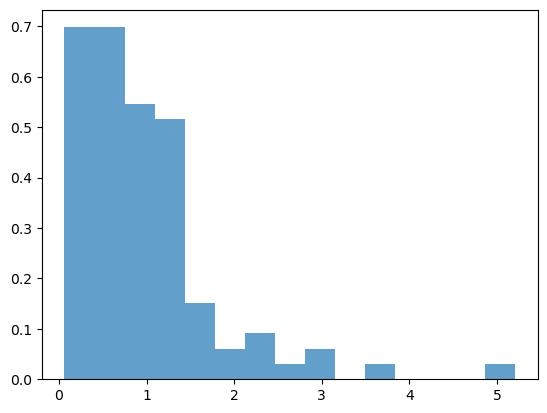

In [162]:
# Create a histogram
plt.hist(data.X1, bins='auto', density=True, alpha=0.7)
plt.show()

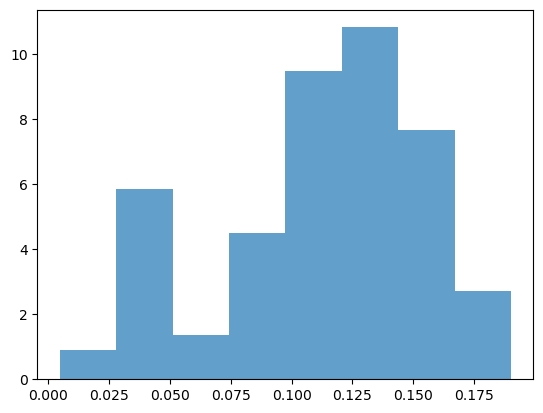

In [163]:
# Create a histogram
plt.hist(data.X3, bins='auto', density=True, alpha=0.7)

plt.show()

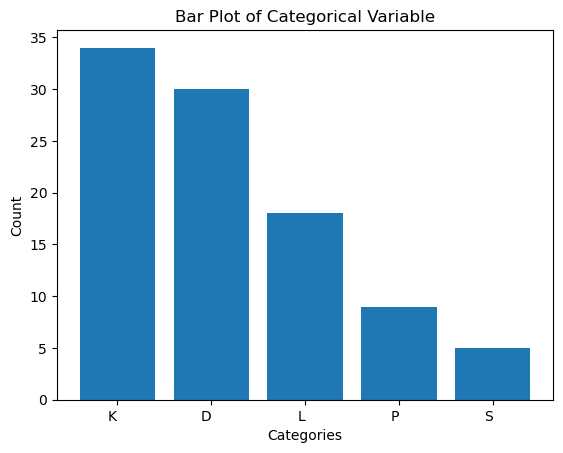

In [164]:

import matplotlib.pyplot as plt

# Count the occurrences of each category in the 'Category' column
category_counts = data.X2.value_counts()
# Extract the categories and their counts
categories = category_counts.index
counts = category_counts.values

# Create a bar plot
#plt.figure(figsize=(10, 8))  # Set the figure size
plt.bar(categories, counts)

# Set plot labels and title
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Bar Plot of Categorical Variable')

# Rotate x-axis labels if they are too long
plt.xticks(rotation=0, ha='right')

# Show the plot
plt.show()


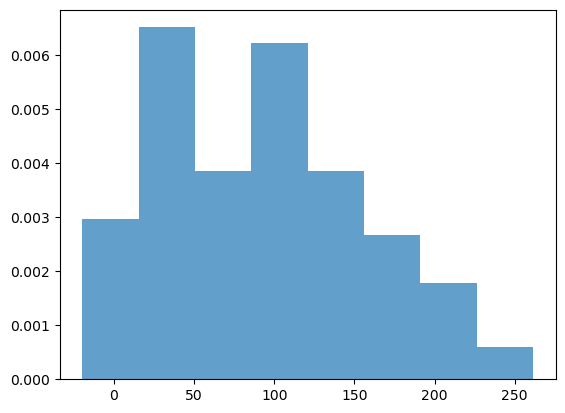

In [165]:
# Create a histogram
plt.hist(data.Y, bins='auto', density=True, alpha=0.7)

plt.show()

## Scatter Plot

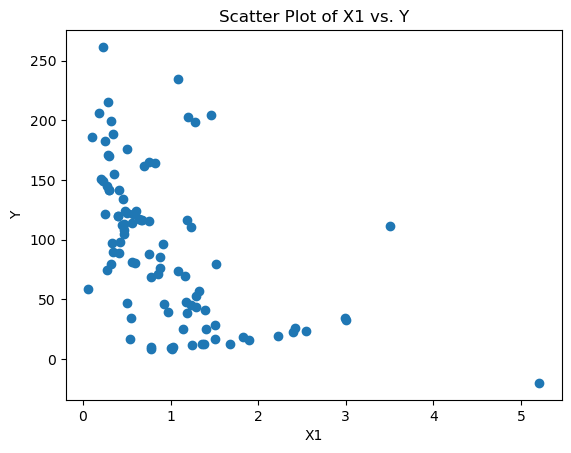

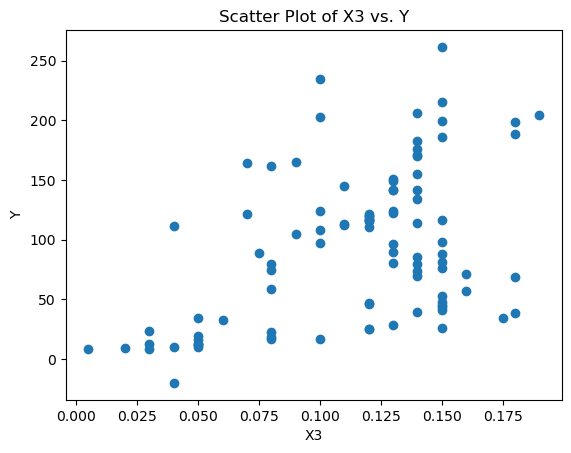

In [166]:
import matplotlib.pyplot as plt

# List of numeric column names (exclude the target variable)
numeric_columns = [col for col in data.columns if pd.api.types.is_numeric_dtype(data[col]) and col != 'Y']

# Define the target variable
target_variable = 'Y'

# Loop through the numeric columns and create scatter plots
for col in numeric_columns:
    plt.scatter(data[col], data[target_variable])
    plt.title(f'Scatter Plot of {col} vs. {target_variable}')
    plt.xlabel(col)
    plt.ylabel(target_variable)
    plt.show()


## Polynomial Regression (Degree of 2 & 3) 

In [167]:
# Perform one-hot encoding on the categorical variable 'X2'
data = pd.get_dummies(data, columns=['X2'], drop_first=True)

# Extract the predictor variables (X1, X3, and their polynomial terms)
X = data[['X1', 'X3']]
poly = PolynomialFeatures(degree=3, include_bias=False)  # Include only up to cubic terms
X_poly = poly.fit_transform(X)


In [168]:

# Combine the polynomial features with the one-hot encoded 'X2'
X_poly_data = pd.DataFrame(X_poly, columns=poly.get_feature_names_out(X.columns))
X_all = pd.concat([X_poly_data, data.drop(['X1', 'X3', 'Y' , 'HERBS'], axis=1)], axis=1)

# Target variable
y = data['Y']

# Split the data (training and testing sets)
X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size=0.2, random_state=42)



In [169]:
# Create a linear regression model and fit it to the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the target variable on the test set
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R-squared: {r2}")
print(f"Mean Squared Error: {mse}")


R-squared: 0.2662665366223519
Mean Squared Error: 3082.654820224532


In [170]:
# Access the coefficients (parameter estimates) of the model
coefficients = model.coef_

# Optionally, you can also access the intercept (constant) term
intercept = model.intercept_

# Create a DataFrame to display the coefficients with their respective variable names
# In this case, variable names correspond to the polynomial features
variable_names = X_train.columns
coefficients_data = pd.DataFrame({'Variable': variable_names, 'Coefficient': coefficients})
print(intercept)
print(coefficients_data)

-230.31678461026206
   Variable    Coefficient
0        X1     249.170519
1        X3    7854.464558
2      X1^2     -38.952640
3     X1 X3   -4821.823795
4      X3^2  -52880.465288
5      X1^3       0.772464
6   X1^2 X3     506.473843
7   X1 X3^2   15888.625041
8      X3^3  126562.520052
9      X2_K     -55.366888
10     X2_L       3.194146
11     X2_P     -27.194349
12     X2_S      19.956320


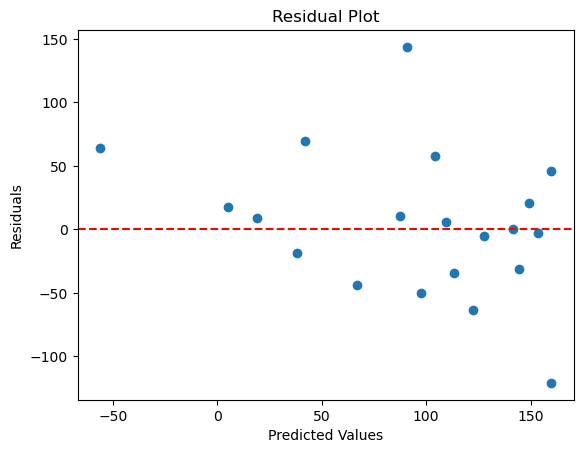

In [171]:
# Calculate the residuals (differences between actual and predicted values)
residuals = y_test - y_pred

# Create a residual plot
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

In [172]:
import statsmodels.api as sm

# Add a constant term (intercept) to the design matrix
X_train = sm.add_constant(X_train)

# Create an OLS (Ordinary Least Squares) model
ols_model = sm.OLS(y_train, X_train)

# Fit the OLS model
results = ols_model.fit()

# Print the summary of the regression results
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     9.403
Date:                Sat, 04 Nov 2023   Prob (F-statistic):           2.37e-10
Time:                        15:45:11   Log-Likelihood:                -380.89
No. Observations:                  76   AIC:                             789.8
Df Residuals:                      62   BIC:                             822.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -230.3168    154.612     -1.490      0.1

# Refit the model(drop the insignificant terms)

In [173]:
data = pd.read_excel('Chinese Herbs.xlsx')

In [174]:
# Assuming 'data' is your DataFrame
data['X1*X3'] = data['X1'] * data['X3']
data['X3^3'] = data['X3'] ** 3
data['X1*X3^2'] = data['X1'] * (data['X3'] ** 2)


In [175]:

from sklearn.linear_model import LinearRegression

# Prepare the feature matrix (X) with the selected variables
X_new = data[['X3', 'X1*X3', 'X3^3', 'X1*X3^2']].join(pd.get_dummies(data['X2'], drop_first=True))

# Target variable (Y)
y = data['Y']

# Split the data (training and testing sets)
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)



In [176]:
# Create a linear regression model and fit it to the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the target variable on the test set
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R-squared: {r2}")
print(f"Mean Squared Error: {mse}")

R-squared: 0.29177475145273346
Mean Squared Error: 2975.4864473385232


In [177]:
# Access the coefficients (parameter estimates) of the model
coefficients = model.coef_

# Optionally, you can also access the intercept (constant) term
intercept = model.intercept_

# Create a DataFrame to display the coefficients with their respective variable names
# In this case, variable names correspond to the polynomial features
variable_names = X_train.columns
coefficients_data = pd.DataFrame({'Variable': variable_names, 'Coefficient': coefficients})
print(intercept)
print(coefficients_data)

88.4700426703732
  Variable   Coefficient
0       X3    196.012873
1    X1*X3   -280.112782
2     X3^3  12533.182611
3  X1*X3^2    432.132627
4        K    -58.897045
5        L      2.185703
6        P    -36.262989
7        S     28.193917
